In [307]:
fs = 9;
texStyle := {FontFamily -> "Latin Modern Roman", FontSize -> fs, Black};
graphsOpts := {Mesh -> Full, BaseStyle -> texStyle, Frame -> True, 
  FrameStyle -> Black, ImageSize -> 200, PlotStyle -> ColorData[3]}
SetOptions[Plot, graphsOpts];

## First order 1D element

1       2                         1       2
{{{0, 1}, {-, 0}, {-, 0}, {1, 0}}, {{0, 0}, {-, 1}, {-, 0}, {1, 0}}, 
           3       3                         3       3
 
              1       2                         1       2
>   {{0, 0}, {-, 0}, {-, 1}, {1, 0}}, {{0, 0}, {-, 0}, {-, 0}, {1, 1}}}
              3       3                         3       3
   1                                    9 (-1 + x) x (-2 + 3 x)
{-(-) ((-1 + x) (-2 + 3 x) (-1 + 3 x)), -----------------------, 
   2                                               2
 
                                              2
    -9 (-1 + x) x (-1 + 3 x)      9 (-1 + x) x
>   ------------------------, x + -------------}
               2                        2
{-\frac{1}{2} (\xi -1) (3 \xi -2) (3 \xi -1), \frac{9}{2} (\xi -1) \xi  (3 \xi -2), 
 
>   -\frac{9}{2} (\xi -1) \xi  (3 \xi -1), \frac{9}{2} (\xi -1) \xi ^2+\xi}
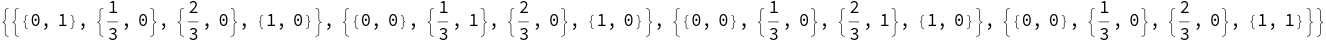
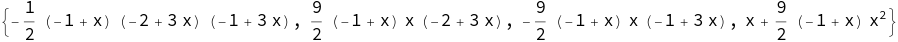
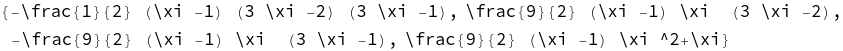

In [363]:
pts = IdentityMatrix[4];
pts = Table[{i/3, pts[[i + 1, j]]}, {j, 4}, {i, 0, 3}]

poly = InterpolatingPolynomial[#, x] & /@ pts;
poly = FullSimplify[poly]
TeXForm /@ (FullSimplify@InterpolatingPolynomial[#, {\[Xi]}] & /@ pts)

-Graphics-
frame.pdf
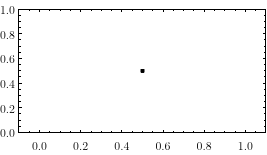

In [355]:
ListPlot[{{1, 1}/2},graphsOpts,   AspectRatio -> 1/2,PlotRange -> {{-.1,1.1},{0,1}}]
Export["frame.pdf",%]

-Graphics-
1D-ements.pdf
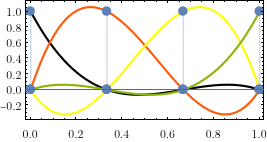

In [371]:
graph = Show[{Plot[poly, {x, 0, 1}, PlotRange -> All, Mesh -> None, 
   Filling -> None, 
   FillingStyle -> Directive[ColorData[6], Opacity[.2]], 
   AspectRatio -> 1/2]
  ,
  ListPlot[Flatten[pts, 1], Filling -> Axis, 
   PlotStyle -> PointSize[0.04]]}]
   
Export["1D-ements.pdf",graph]

In [319]:
pts = {{0, 0}, {1/2, 0}, {1, 0}, {0, 1/2}, {1/2, 1/2}, {0, 1}};
pts = Table[ MapThread[{#1, #2} &, {pts, IdentityMatrix[6][[i]]}], {i, 6}];
\[ScriptCapitalD] =   MeshRegion[{{0, 0}, {1, 0}, {0, 1}}, Triangle[{1, 2, 3}]];

{(-1 + x + y) (-1 + 2 x + 2 y), -4 x (-1 + x + y), x (-1 + 2 x), -4 y (-1 + x + y), 
 
>   4 x y, y (-1 + 2 y)}
{\left(\xi _1+\xi _2-1\right) \left(2 \xi _1+2 \xi _2-1\right), 
 
>   -4 \xi _1 \left(\xi _1+\xi _2-1\right), \xi _1 \left(2 \xi _1-1\right), 
 
>   -4 \xi _2 \left(\xi _1+\xi _2-1\right), 4 \xi _1 \xi _2, 
 
>   \xi _2 \left(2 \xi _2-1\right)}
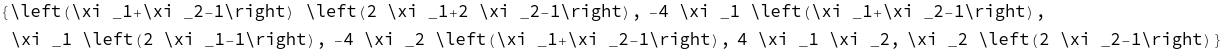

In [322]:
poly = InterpolatingPolynomial[#, {x, y}] & /@ pts;
poly = FullSimplify[poly]
TeXForm /@ (FullSimplify@InterpolatingPolynomial[#, {Subscript[\[Xi], 1], Subscript[\[Xi], 2]}] & /@ pts)

{{0., Null, 0.01}, {0.1, Null, 0.01}, {0.2, Null, 0.01}, {0.3, Null, 0.01}, 
 
>   {0.4, Null, 0.01}, {0.5, Null, 0.01}, {0.6, Null, 0.01}, {0.7, Null, 0.01}, 
 
>   {0.8, Null, 0.01}, {0.9, Null, 0.01}, {1., Null, 0.01}, {0., Null, 0.025}, 
 
>   {0.5, Null, 0.025}, {1., Null, 0.025}}
{-Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-}
{2D-element-1.svg, 2D-element-2.svg, 2D-element-3.svg, 2D-element-4.svg, 
 
>   2D-element-5.svg, 2D-element-6.svg}
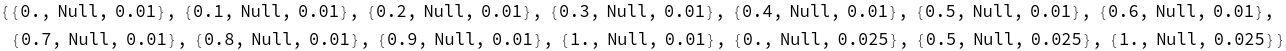
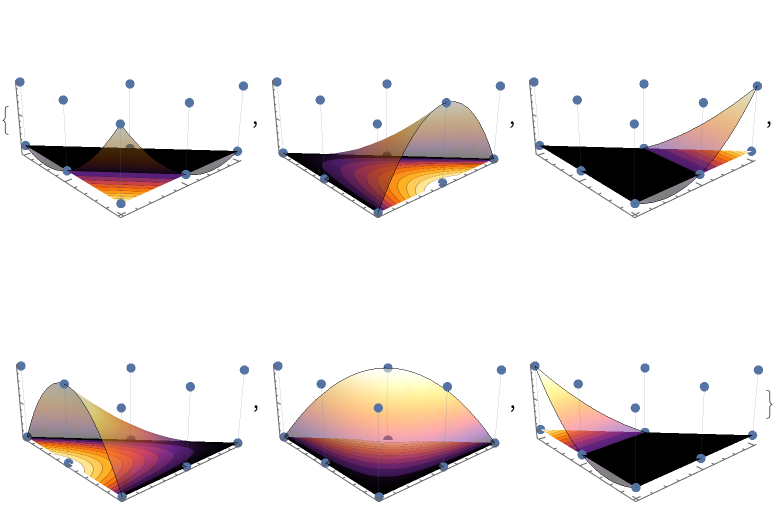

In [325]:
ticks = Join[Table[{i,Null,.01},{i,0,1,.1}], Table[{i,Null,.025},{i,0,1,.5}]]

cp = ContourPlot[#, {x, y} \[Element] \[ScriptCapitalD],
     PlotRange -> All,
     Contours -> 10,
     Axes -> False,
     PlotPoints -> 30,
     PlotRangePadding -> 0,
     Frame -> False,
     ColorFunctionScaling -> True,
     ColorFunction -> ColorData["SunsetColors"]] & /@ poly;
     
plot3d = Plot3D[poly[[#]], {x, y} \[Element] \[ScriptCapitalD],
     PlotRange -> Full,
     Ticks -> {ticks,ticks,ticks},
     Mesh -> None,
     BaseStyle -> texStyle,
     Boxed -> False,
     AxesEdge -> {{-1, -1}, {-1, -1}, {-1, 1}},
     PlotStyle -> Directive[Opacity[.5]],
     ColorFunctionScaling -> True,
     ColorFunction -> ColorData["SunsetColors"],
     ImageSize -> 213*1] & /@ Range[1, Length[poly]];

level = -.0; 
gr =  Graphics3D[{Texture[#], EdgeForm[],
             Polygon[{{0, 0, level}, {0, 1, level}, {1, 0, level}}, 
             VertexTextureCoordinates -> {{0, 0}, {0, 1}, {1, 0}}]}, 
            Lighting -> "Neutral"] & /@ cp;

ref = ListPointPlot3D[Partition[Flatten[pts], 3],  PlotStyle -> PointSize[0.04], Filling -> Bottom];

graphs = MapThread[Show[{#1, #2, ref},
   PlotRange -> All,
   BoxRatios -> {1, 1, .5},
   ViewPoint -> {-1.75, -2, 1},
   ImageSize-> 180
   ] &, {plot3d, gr}]
   
Export["2D-element-"<>ToString[#]<>".svg",graphs[[#]] ] &/@Range[1,Length[graphs]]